**Thinkful - 3.6.5 - Challenge - Predicting Housing Prices**

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.model_selection import cross_val_score

# Display preferences.
#pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(action="ignore",module="scipy",message="^internal gelsd")

# Grab and process the raw data.
df2 = pd.read_csv('Data/Melbourne_housing_FULL.csv')
print("Length = ",len(df2))
print(df2.isnull().sum())
df2.head()

Length =  34857
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df = df2.drop(['Date','Address'],axis=1)
#df = df.dropna(subset=['Price','Distance','Postcode','CouncilArea','Regionname','Propertycount'])
df = df.dropna()
df = df.fillna('')
df = pd.get_dummies(df, columns=['Suburb','Type','Method','SellerG','CouncilArea','Regionname'])

Y = df['Price']
X = df.drop(['Price'],axis=1)

,Price,Distance,Rooms,Postcode,Lattitude,Longtitude,Bathroom,Car,Landsize,YearBuilt,Propertycount
Price,1.000000,-0.231212,0.475074,0.046033,-0.224255,0.212174,0.463501,0.209464,0.058375,-0.313664,-0.059720
Distance,-0.231212,1.000000,0.276585,0.489537,-0.055317,0.163941,0.122132,0.259374,0.138559,0.313383,-0.003247
Rooms,0.475074,0.276585,1.000000,0.084236,0.018758,0.083016,0.624070,0.401423,0.101158,0.006935,-0.082797
Postcode,0.046033,0.489537,0.084236,1.000000,-0.195081,0.358005,0.111617,0.055531,0.069623,0.089913,0.032758
Lattitude,-0.224255,-0.055317,0.018758,-0.195081,1.000000,-0.345797,-0.041859,0.015139,0.042484,0.100030,0.029793
Longtitude,0.212174,0.163941,0.083016,0.358005,-0.345797,1.000000,0.109268,0.035589,-0.008196,-0.026886,0.026359
Bathroom,0.463501,0.122132,0.624070,0.111617,-0.041859,0.109268,1.000000,0.310962,0.075939,0.192914,-0.058324
Car,0.209464,0.259374,0.401423,0.055531,0.015139,0.035589,0.310962,1.000000,0.123498,0.139255,-0.031285
Landsize,0.058375,0.138559,0.101158,0.069623,0.042484,-0.008196,0.075939,0.123498,1.000000,0.037753,-0.032548
YearBuilt,-0.313664,0.313383,0.006935,0.089913,0.100030,-0.026886,0.192914,0.139255,0.037753,1.000000,0.017224


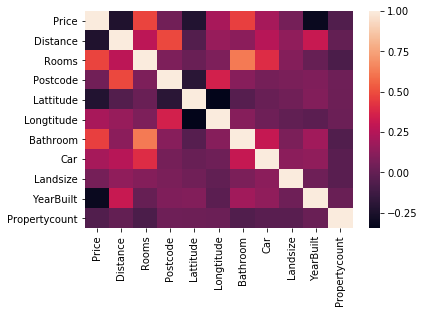

In [4]:
mtx = df[['Price','Distance','Rooms','Postcode','Lattitude','Longtitude','Bathroom',
           'Car','Landsize','YearBuilt','Propertycount']]

sns.heatmap(mtx.corr())
correlation_matrix = mtx.corr()
display(correlation_matrix)

**Weighted KNN Regression**

R-squared:  0.999997826972
[ 0.59797427  0.62089082  0.62167031  0.45979176  0.51752469  0.53121514
  0.44180119  0.61386161  0.65667059  0.67864168]
Weighted Accuracy: 0.57 (+/- 0.15)


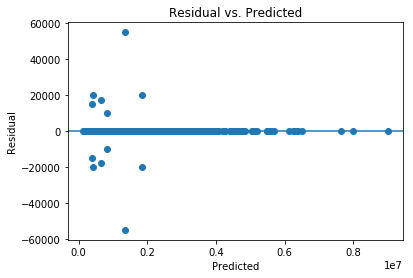

In [12]:
from sklearn import neighbors
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(X,Y)

#Inspect results
print("R-squared: ",knn_w.score(X,Y))
score_w = cross_val_score(knn_w, X, Y, cv=10)
print(score_w)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

# Extract predicted values.
predict_knn = knn_w.predict(X)
resid_knn = Y - predict_knn

df['KNN Predict'] = pd.Series(predict_knn, index=df.index)
df['KNN Resid'] = pd.Series(resid_knn, index=df.index)
plt.scatter(predict_knn, resid_knn)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

**Linear Regression**


R-squared:
0.750519169623
[ 0.64665802  0.74131839  0.60525071  0.64425126  0.61414763  0.68076314
  0.53201082  0.71883742  0.73244478  0.72858116]
Weighted Accuracy: 0.66 (+/- 0.13)


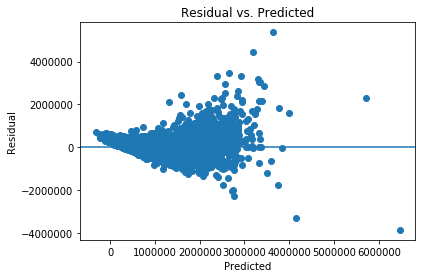

In [13]:
from sklearn import linear_model

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
regr.fit(X, Y)

# Inspect the results.
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['Price']

# Calculate the error, also called the residual.
residual = actual - predicted

df['Predicted'] = pd.Series(predicted, index=df.index)
df['Residual'] = pd.Series(residual, index=df.index)

#Inspect results
score_w = cross_val_score(regr, X, Y, cv=10)
print(score_w)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

# Extract predicted values.
predict_regr = regr.predict(X)
resid_regr = Y - predict_regr

df['Regr Predict'] = pd.Series(predict_regr, index=df.index)
df['Regr Resid'] = pd.Series(resid_regr, index=df.index)
plt.scatter(predict_regr, resid_regr)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

**Support Vector Machines**


R-squared:
-0.0806258362372
[ -3.25640298e-01  -8.74273166e-02  -7.11313580e-02  -1.94170587e-02
  -6.06361548e-02  -3.98265291e-02  -2.98200377e-04  -1.55160409e-01
  -1.10371939e-01  -1.47814070e-01]
Weighted Accuracy: -0.10 (+/- 0.18)


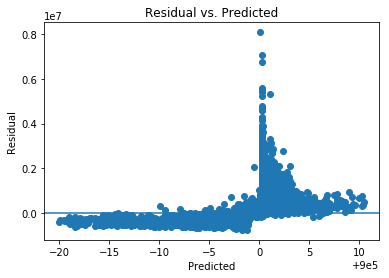

In [14]:
from sklearn.svm import SVR
Y = df['Price']
svr = SVR()
svr.fit(X,Y)

#Inspect results
print('\nR-squared:')
print(svr.score(X, Y))
score_w = cross_val_score(svr, X, Y, cv=10)
print(score_w)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

# Extract predicted values.
predict_svr = svr.predict(X)
resid_svr = Y - predict_svr

df['SVR Predict'] = pd.Series(predict_svr, index=df.index)
df['SVR Resid'] = pd.Series(resid_svr, index=df.index)
plt.scatter(predict_svr, resid_svr)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

**Gradient Boost Regressor**


R-squared:
0.861245606882
[ 0.79570782  0.83017906  0.77553839  0.78992068  0.80574917  0.80581411
  0.66538467  0.78281352  0.82279156  0.79395529]
Weighted Accuracy: 0.79 (+/- 0.09)


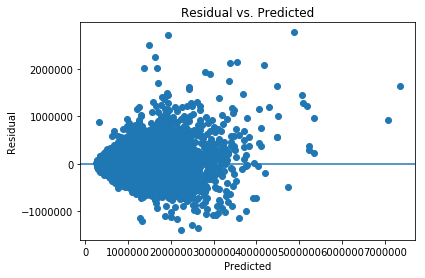

In [15]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor()
clf.fit(X,Y)

#Inspect results
print('\nR-squared:')
print(clf.score(X, Y))
score_w = cross_val_score(clf, X, Y, cv=10)
print(score_w)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

# Extract predicted values.
predict_clf = clf.predict(X)
resid_clf = Y - predict_clf

df['CLF Predict'] = pd.Series(predict_clf, index=df.index)
df['CLF Resid'] = pd.Series(resid_clf, index=df.index)
plt.scatter(predict_clf, resid_clf)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()